<h1> Hotel Booking

Baseado nos atributos, determinar se uma reserva vai ser cancelada ou não.

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [129]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [130]:
pd.set_option('display.max_columns',32)#função para mostrar todas as 32 colunas

In [131]:
df=pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


<h1> Explorando e preparando os dados

<h2> Missing values

In [132]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [133]:
df.shape

(119390, 32)

In [134]:
print('% da coluna children que é NaN:',df['children'].isna().sum()*100/df.shape[0])
print('% da coluna country que é NaN:',df['country'].isna().sum()*100/df.shape[0])
print('% da coluna agent que é NaN:',df['agent'].isna().sum()*100/df.shape[0])
print('% da coluna company que é NaN:',df['company'].isna().sum()*100/df.shape[0])

% da coluna children que é NaN: 0.0033503643521232934
% da coluna country que é NaN: 0.40874445095904177
% da coluna agent que é NaN: 13.686238378423653
% da coluna company que é NaN: 94.30689337465449


In [135]:
df.drop(['company'], axis=1,inplace=True)

In [136]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

<h3> Children

In [137]:
pd.value_counts(df['children'],sort=True, ascending=False)#, return_counts=True)

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [138]:
#substituir os valores faltantes de children pelo valor que mais aparece: 0
data_clean = df
data_clean['children'].fillna(0,inplace=True)

### Country

In [139]:
pd.value_counts(df['country'],sort=True, ascending=False)#, return_counts=True)

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [140]:
#substituir os valores faltantes de country pelo valor que mais aparece: PRT
data_clean['country'].fillna('PRT',inplace=True)

In [141]:
pd.value_counts(data_clean['country'],sort=True, ascending=False)#, return_counts=True)

PRT    49078
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

### Agent

In [142]:
pd.value_counts(df['agent'],sort=True, ascending=False)#, return_counts=True)

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: agent, Length: 333, dtype: int64

In [143]:
#substituir os valores faltantes de country pelo valor que mais aparece: PRT
data_clean['agent'].fillna(9.0,inplace=True)

In [144]:
pd.value_counts(data_clean['agent'],sort=True, ascending=False)#, return_counts=True)

9.0      48301
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
280.0        1
285.0        1
289.0        1
265.0        1
497.0        1
Name: agent, Length: 333, dtype: int64

In [145]:
data_clean.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

### Adultos, crianças e bebês.

In [146]:
list=['children','adults','babies']

for i in list:
    print('{} has unique values as {}'.format(i,data_clean[i].unique()))

children has unique values as [ 0.  1.  2. 10.  3.]
adults has unique values as [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
babies has unique values as [ 0  1  2 10  9]


In [147]:
len(data_clean[data_clean['adults']==0])

403

In [148]:
filter=(data_clean['children']==0) & (data_clean['adults']==0) & (data_clean['babies']==0)
data_clean[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,9.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,9.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,9.0,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


Se adultos, crianças e bebes são zero, logo não fazer sentido, excluir estas 180 linhas

In [149]:
data = data_clean[~filter]
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,9.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


Insights tirados dos dados

filter=(data_clean['children']==0) & (data_clean['adults']==0) & (data_clean['babies']==0)

data_clean[filter]

## Insights tirados dos dados

### De onde vem os hospedes vieram?

In [150]:
country_data=data[data['is_canceled']==0]['country'].value_counts().reset_index()
country_data.columns=['country','No of guests']
country_data

,country,No of guests
0,PRT,21398
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


In [151]:
import folium
from folium.plugins import HeatMap

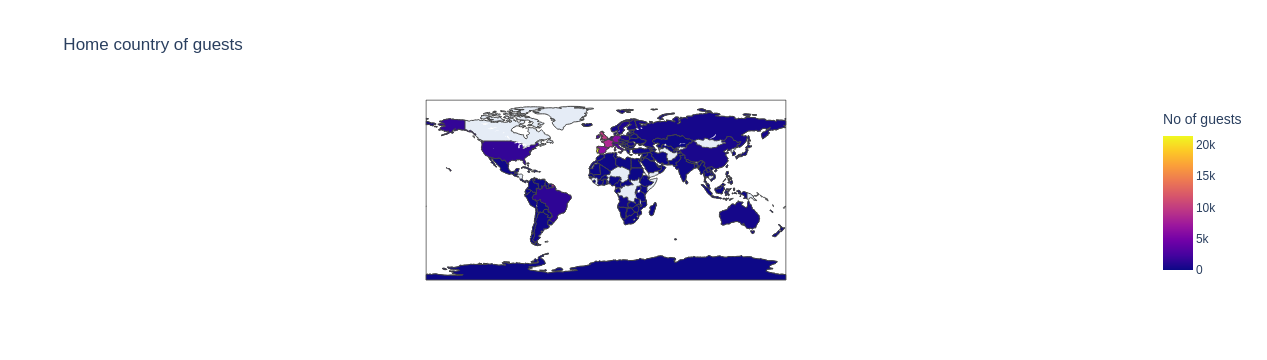

In [152]:
# show on map
map_guest = px.choropleth(country_data,
                    locations=country_data['country'],
                    color=country_data['No of guests'], 
                    hover_name=country_data['country'], 
                    title="Home country of guests")
map_guest.show()

A grande maioria vem de Portugal

### Qual o valor da diária por tipo de quarto?

In [153]:
data2=data[data['is_canceled']==0]

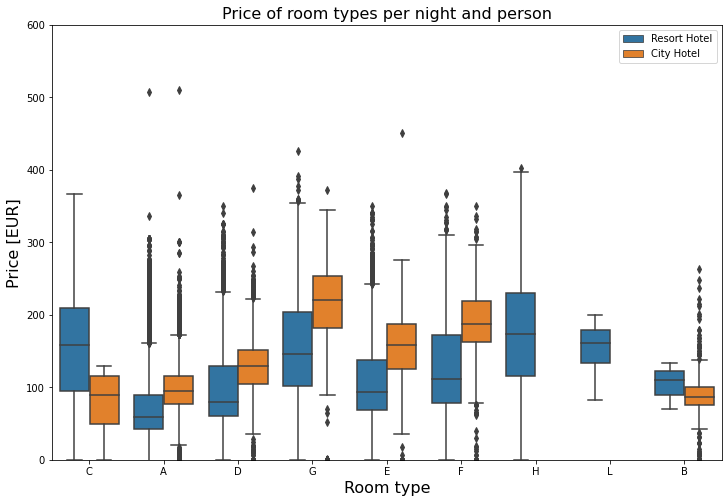

In [154]:
# boxplot:
plt.figure(figsize=(12, 8))
sns.boxplot(x="reserved_room_type",
            y="adr",
            hue="hotel",
            data=data2)
plt.title("Price of room types per night and person", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 600)
plt.show()

### Quanto custa a diária dependendo do mês

In [155]:
data_resort = data[(data["hotel"] == "Resort Hotel") & (data["is_canceled"] == 0)]
data_city = data[(data["hotel"] == "City Hotel") & (data["is_canceled"] == 0)]

In [156]:
resort_hotel=data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.410104
3,February,54.147478
4,January,48.761125
5,July,150.122528
6,June,107.974850
7,March,57.056838
8,May,76.657558
9,November,48.706289


In [157]:
city_hotel=data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,111.962267
1,August,118.674598
2,December,88.401855
3,February,86.520062
4,January,82.330983
5,July,115.818019
6,June,117.874360
7,March,90.658533
8,May,120.669827
9,November,86.946592


In [158]:
final=resort_hotel.merge(city_hotel,on='arrival_date_month')
final.columns=['month','price_for_resort','price_for_city_hotel']
final

,month,price_for_resort,price_for_city_hotel
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


In [159]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
final['month'] = pd.Categorical(final['month'], categories=months, ordered=True)
final.sort_values(by='month',inplace=True)
final

,month,price_for_resort,price_for_city_hotel
4,January,48.761125,82.330983
3,February,54.147478,86.520062
7,March,57.056838,90.658533
0,April,75.867816,111.962267
8,May,76.657558,120.669827
6,June,107.974850,117.874360
5,July,150.122528,115.818019
1,August,181.205892,118.674598
11,September,96.416860,112.776582
10,October,61.775449,102.004672


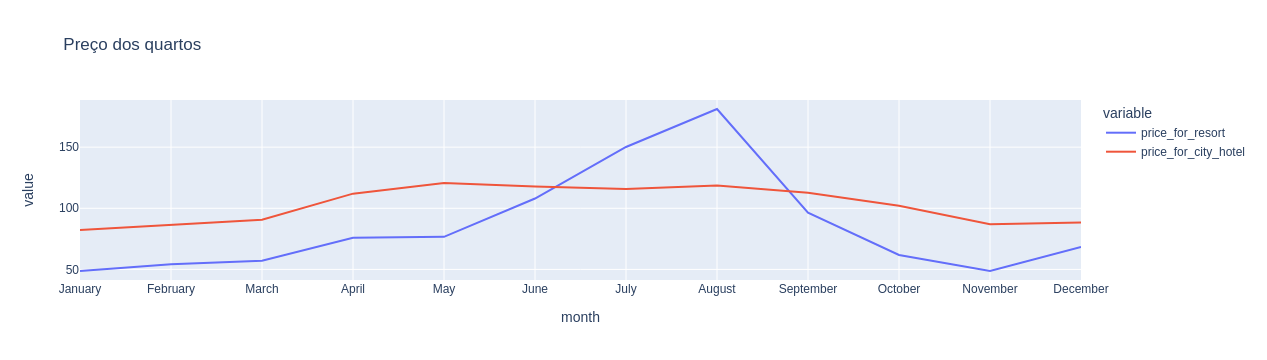

In [160]:
px.line(final, x='month', y=['price_for_resort','price_for_city_hotel'], title='Preço dos quartos')

Resort tem os maiores preços durante o verão do hemisfério Norte

### Meses mais movimentados

In [161]:
rush_resort=data_resort['arrival_date_month'].value_counts().reset_index()
rush_resort.columns=['month','no of guests']
rush_resort

,month,no of guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [162]:
rush_city=data_city['arrival_date_month'].value_counts().reset_index()
rush_city.columns=['month','no of guests']
rush_city

,month,no of guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [163]:
final_rush=rush_resort.merge(rush_city,on='month')
final_rush.columns=['month','no of guests in resort','no of guest in city hotel']
final_rush

,month,no of guests in resort,no of guest in city hotel
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [164]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
final_rush['month'] = pd.Categorical(final_rush['month'], categories=months, ordered=True)
final_rush.sort_values(by='month',inplace=True)
final_rush

,month,no of guests in resort,no of guest in city hotel
11,January,1866,2249
6,February,2308,3051
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
8,June,2037,4358
1,July,3137,4770
0,August,3257,5367
7,September,2102,4283
2,October,2575,4326


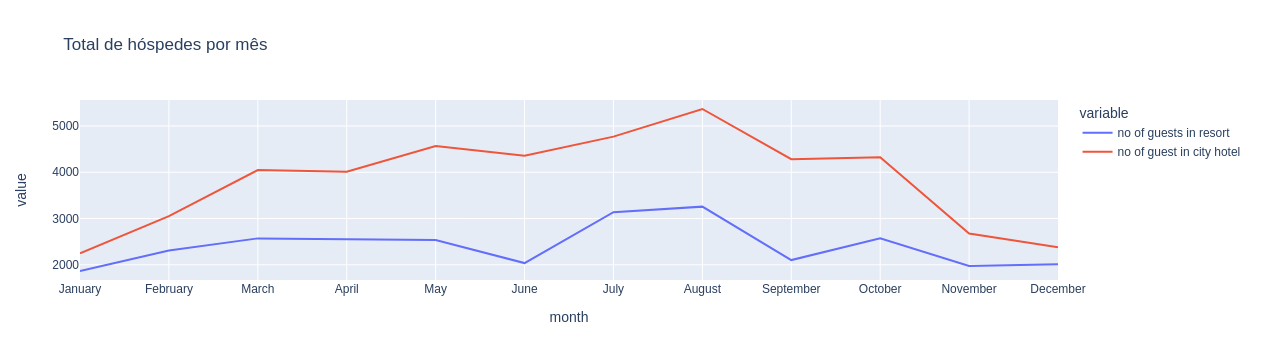

In [165]:
px.line(final_rush, x='month', y=['no of guests in resort','no of guest in city hotel'], title='Total de hóspedes por mês')

Conclusão

O hotel na cidade recebe mais hóspedes durante a primavera e o outono, quando os preços também são mais altos.
Em julho e agosto há menos visitantes, embora os preços sejam mais baixos.

O número de hóspedes doResort diminui ligeiramente de junho a setembro, que também é quando os preços são mais altos.
Ambos os hotéis têm o menor número de hóspedes durante o inverno.

### Quanto tempo as pessoas ficam nos hotéis

In [166]:
filter=data['is_canceled']==0
clean_data=data[filter]

In [167]:
clean_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,9.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [168]:
clean_data['total_nights'] = clean_data['stays_in_week_nights'] + clean_data['stays_in_weekend_nights']

In [169]:
stay=clean_data.groupby(['total_nights','hotel']).agg('count').reset_index()
stay=stay.iloc[:,0:3]
stay.head()

,total_nights,hotel,is_canceled
0,0,City Hotel,251
1,0,Resort Hotel,371
2,1,City Hotel,9155
3,1,Resort Hotel,6579
4,2,City Hotel,10983


In [170]:
stay=stay.rename(columns={'is_canceled':'Number of stays'})
stay.head()

,total_nights,hotel,Number of stays
0,0,City Hotel,251
1,0,Resort Hotel,371
2,1,City Hotel,9155
3,1,Resort Hotel,6579
4,2,City Hotel,10983


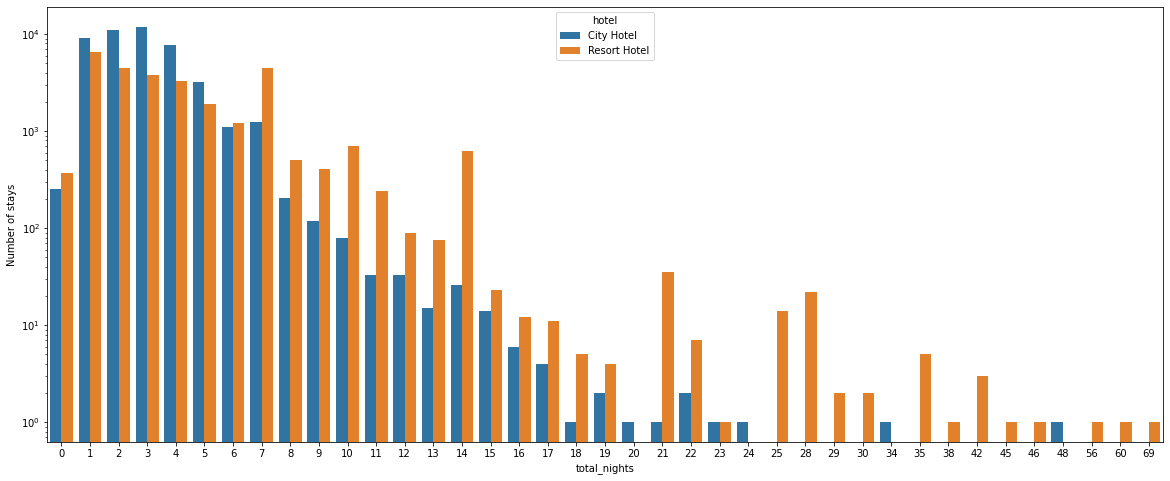

In [171]:
plt.figure(figsize=(20, 8))
sns.barplot(x = "total_nights", y = "Number of stays" , hue="hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=stay)

plt.yscale('log')

<h2> Essa coluna é relevente?

In [172]:
data.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,7/1/2015


<h3> Room type

In [173]:
tmp = data[data['is_canceled']==1]
print('Se houve cancelamento:',np.unique([tmp['reserved_room_type']==tmp['assigned_room_type']], return_counts=True))


tmp = data[data['is_canceled']==0]
print('Se não houve cancelamentos',np.unique([tmp['reserved_room_type']==tmp['assigned_room_type']], return_counts=True))
#Não consegui concluir se devo ou não retirar essa coluna

Se houve cancelamento: (array([False,  True]), array([  801, 43398]))
Se não houve cancelamentos (array([False,  True]), array([13995, 61016]))


### Reservation status

In [174]:
tmp = data[data['is_canceled']==0]
print('Se não houve cancelamento\n',pd.value_counts(tmp['reservation_status'],sort=True, ascending=False))#, return_counts=True)

tmp = data[data['is_canceled']==1]
print('\n\nSe houve cancelamento\n',pd.value_counts(tmp['reservation_status'],sort=True, ascending=False))#, return_counts=True)

Se não houve cancelamento
 Check-Out    75011
Name: reservation_status, dtype: int64


Se houve cancelamento
 Canceled    42993
No-Show      1206
Name: reservation_status, dtype: int64


In [175]:
#reservation status não auxilia em nada em determinar se a reserva foi cancelada ou não
#logo coluna será removida

data.drop(['reservation_status'], axis=1,inplace=True)

### Reservation status date vs arrival date

In [176]:
data['reservation_status_date']=pd.to_datetime(data['reservation_status_date'])
data['reservation_year']=data['reservation_status_date'].dt.year
data['reservation_month']=data['reservation_status_date'].dt.month
data['reservation_day']=data['reservation_status_date'].dt.day
data.drop(['reservation_status_date'], axis=1,inplace=True)

In [177]:
d = {'JAN':1, 'FEB':2, 'MAR':3, 'APR':4, }
months = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
data['arrival_date_month'] = data['arrival_date_month'].map(months)

In [178]:
tmp = data[data['is_canceled']==0]
print('Não cancelou: ',len(tmp),len(tmp[tmp['arrival_date_month']==tmp['reservation_month']]))

tmp = data[data['is_canceled']==1]
print('\nCancelou: ',len(tmp),len(tmp[tmp['arrival_date_month']==tmp['reservation_month']]))


Não cancelou:  75011 66833

Cancelou:  44199 10146


In [179]:
#Não consegui concluir se devo ou não retirar essa coluna

<h2> Feature Encoding

In [180]:
from sklearn.preprocessing import LabelEncoder

In [181]:
data.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_year,reservation_month,reservation_day
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,9.0,0,Transient,0.0,0,0,2015,7,1
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,9.0,0,Transient,0.0,0,0,2015,7,1


In [182]:
#indice das variáveis categoricas

cat_features = [col for col in data.columns if data[col].dtype=='O']# and col not in list_not]
cat_i = [i for i in range(data.shape[1]) if data.iloc[:,i].dtype=='O']

print(cat_features,'\n',cat_i)

['hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type'] 
 [0, 12, 13, 14, 15, 19, 20, 22, 25]


In [183]:
label_encoder_hotel = LabelEncoder()#0
label_encoder_meal = LabelEncoder()
label_encoder_country = LabelEncoder()
label_encoder_market = LabelEncoder()
label_encoder_channel = LabelEncoder()
label_encoder_r_room_type = LabelEncoder()
label_encoder_a_room_type = LabelEncoder()
label_encoder_deposit = LabelEncoder()
label_encoder_costumer_type = LabelEncoder()

In [184]:
data.iloc[:,cat_i[0]] = label_encoder_hotel.fit_transform(data.iloc[:,cat_i[0]])
data.iloc[:,cat_i[1]] = label_encoder_meal.fit_transform(data.iloc[:,cat_i[1]])
data.iloc[:,cat_i[2]] = label_encoder_country.fit_transform(data.iloc[:,cat_i[2]])
data.iloc[:,cat_i[3]] = label_encoder_market.fit_transform(data.iloc[:,cat_i[3]])
data.iloc[:,cat_i[4]] = label_encoder_channel.fit_transform(data.iloc[:,cat_i[4]])
data.iloc[:,cat_i[5]] = label_encoder_r_room_type.fit_transform(data.iloc[:,cat_i[5]])
data.iloc[:,cat_i[6]] = label_encoder_a_room_type.fit_transform(data.iloc[:,cat_i[6]])
data.iloc[:,cat_i[7]] = label_encoder_deposit.fit_transform(data.iloc[:,cat_i[7]])
data.iloc[:,cat_i[8]] = label_encoder_costumer_type.fit_transform(data.iloc[:,cat_i[8]])

In [185]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_year,reservation_month,reservation_day
0,1,0,342,2015,7,27,1,0,0,2,0.0,0,0,135,3,1,0,0,0,2,2,3,0,9.0,0,2,0.0,0,0,2015,7,1
1,1,0,737,2015,7,27,1,0,0,2,0.0,0,0,135,3,1,0,0,0,2,2,4,0,9.0,0,2,0.0,0,0,2015,7,1
2,1,0,7,2015,7,27,1,0,1,1,0.0,0,0,59,3,1,0,0,0,0,2,0,0,9.0,0,2,75.0,0,0,2015,7,2
3,1,0,13,2015,7,27,1,0,1,1,0.0,0,0,59,2,0,0,0,0,0,0,0,0,304.0,0,2,75.0,0,0,2015,7,2
4,1,0,14,2015,7,27,1,0,2,2,0.0,0,0,59,6,3,0,0,0,0,0,0,0,240.0,0,2,98.0,0,1,2015,7,3


In [186]:
data.shape

(119210, 32)

<h2> Outliers

(119210, 32)


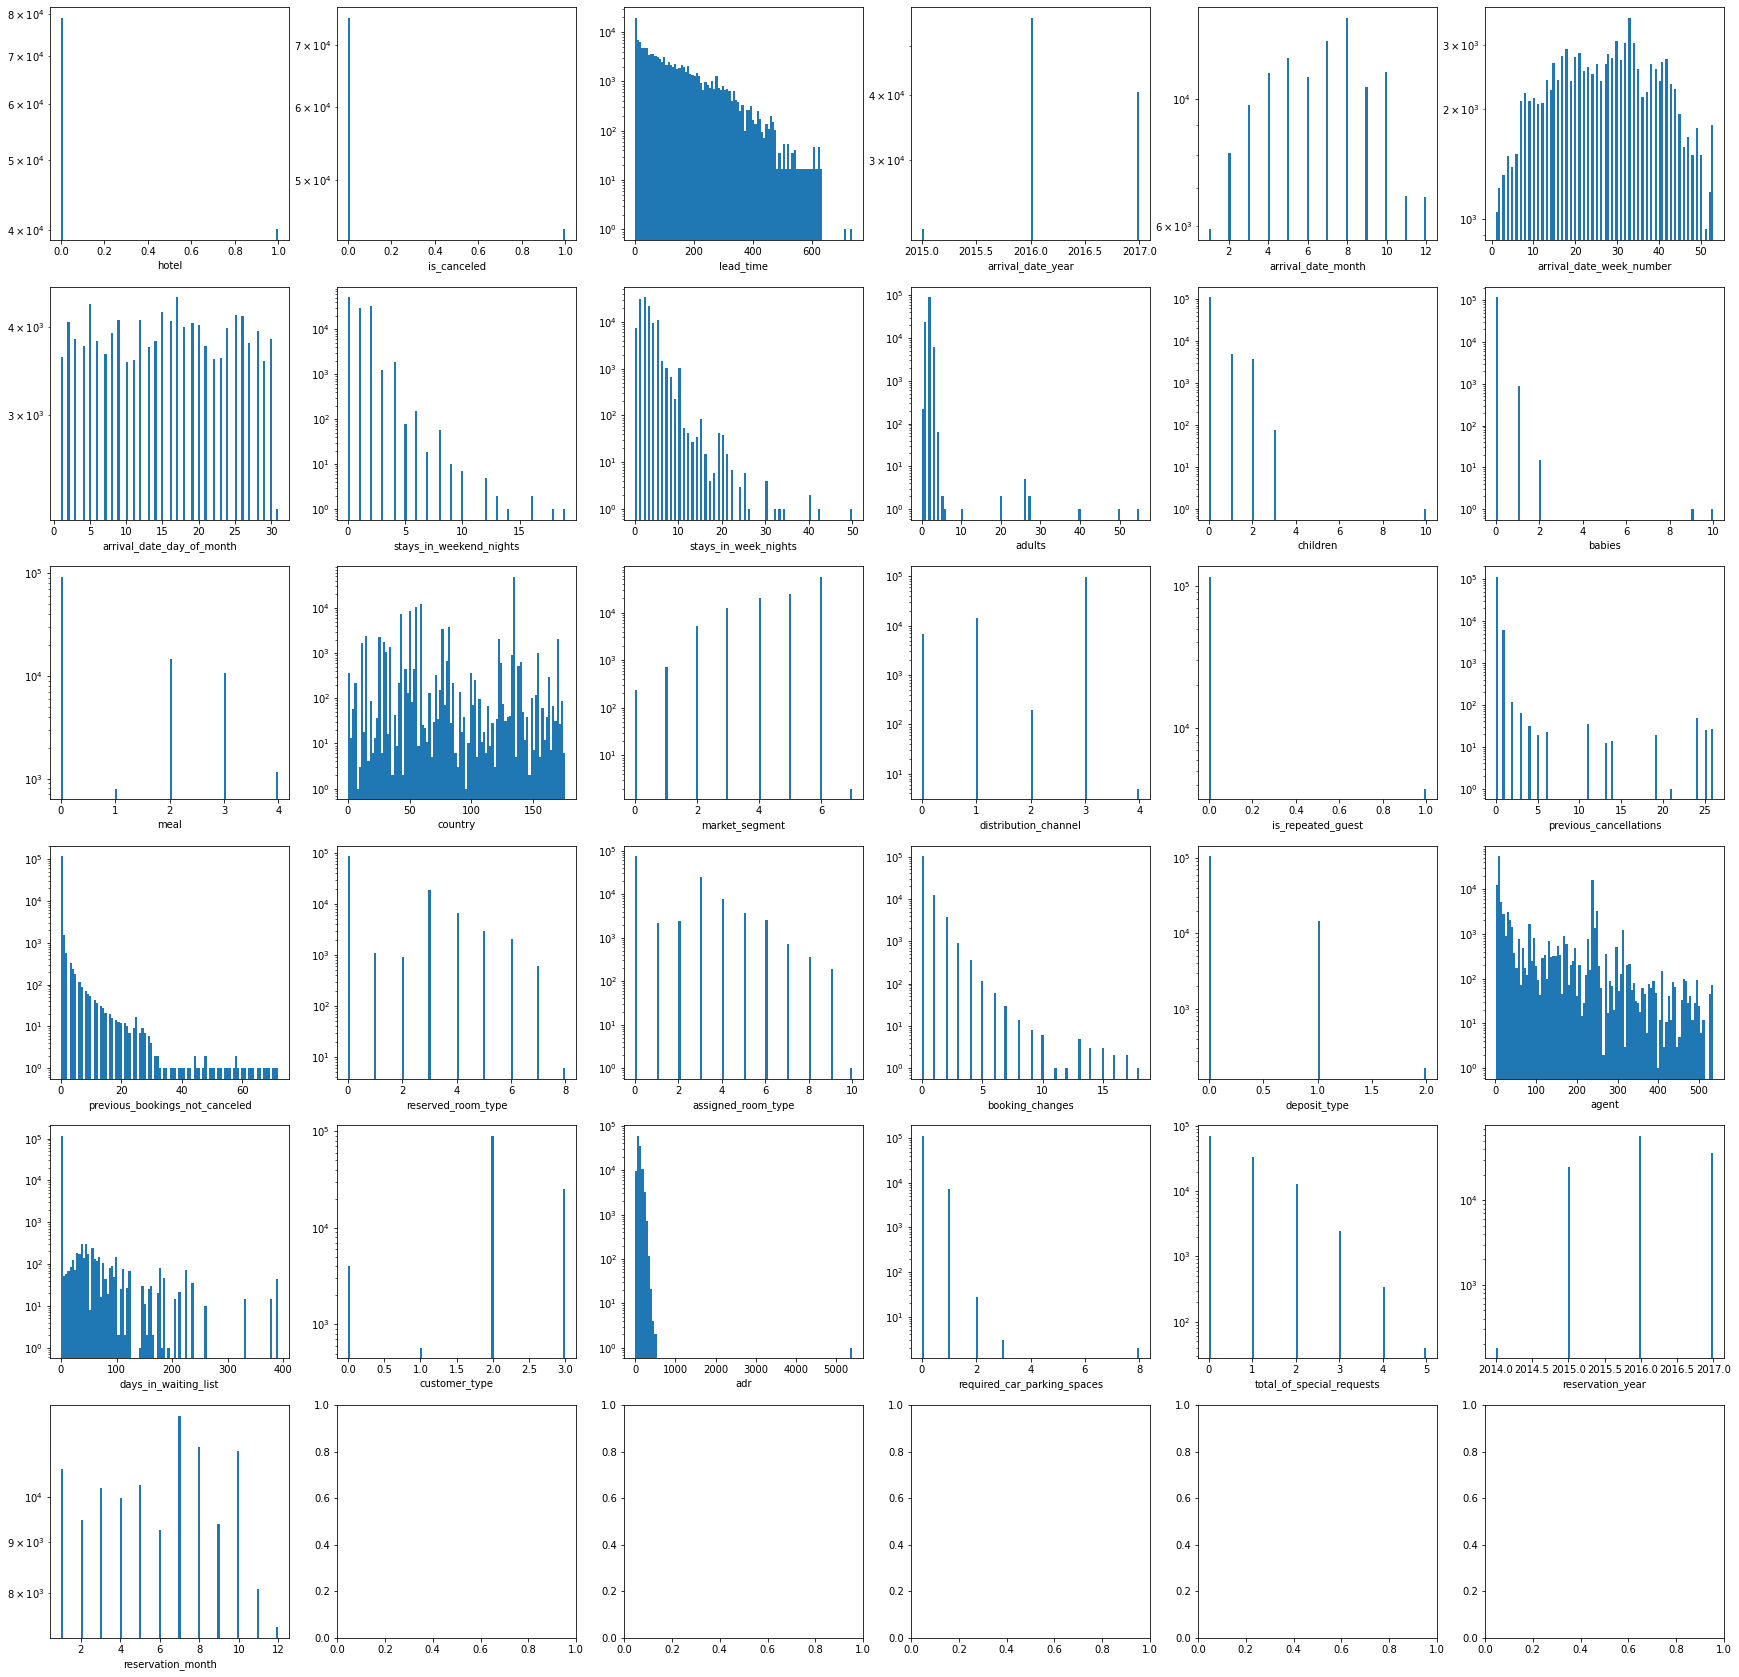

In [187]:
fig, ax = plt.subplots(6,6, figsize=[30,30])
print(data.shape)
for i in range(31):
    ax = plt.subplot(6,6,i+1)
    ax.hist(data.iloc[:,i], bins = 100)
    ax.set_xlabel(data.columns[i])
    ax.set_yscale('log')

In [188]:
data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [127]:
data_pre_out = data

outliers: lead_time, adr

In [189]:
data['lead_time']=np.log1p(data['lead_time'])
data['adr']=np.log1p(data['adr'])

Text(0.5, 0, 'adr')

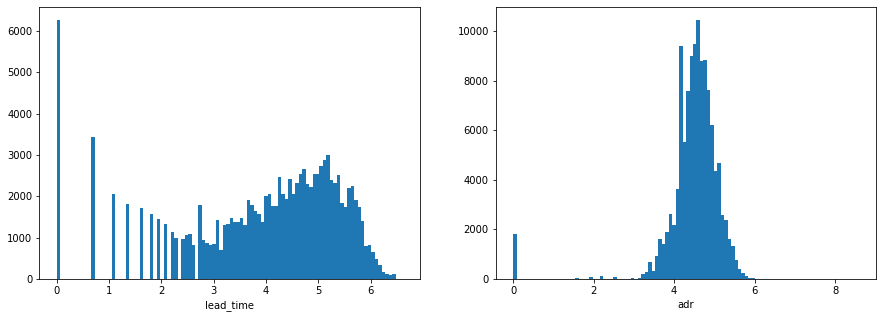

In [190]:
fig, ax = plt.subplots(1,2,figsize=[15,5])

ax = plt.subplot(1,2,1)
ax.hist(data['lead_time'], bins=100);
ax.set_xlabel('lead_time')

ax = plt.subplot(1,2,2)
ax.hist(data['adr'], bins=100);
ax.set_xlabel('adr')


<h2> Escalonamento dos valores

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [207]:
data.dropna(inplace=True)

In [215]:
y = data['is_canceled'].values
x = data.drop(['is_canceled'],axis=1)#,inplace=True)
col = x.columns

In [216]:
y.shape,x.shape

((119209,), (119209, 31))

In [217]:
col.shape,x.shape

((31,), (119209, 31))

In [218]:
x = scaler.fit_transform(x)

In [219]:
x.shape

(119209, 31)

In [69]:
df_x = pd.DataFrame(x, columns=col) 
df_x

ValueError: Shape of passed values is (119210, 32), indices imply (119210, 31)

<h2> Feature Importance

In [197]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [227]:
pipeline = Pipeline([
                    ('scaler',StandardScaler()),
                    ('model',Lasso())
])

In [228]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.logspace(-3,0.5,10)},
                      cv = 10, scoring="neg_mean_squared_error",verbose=3
                      )
#

In [229]:
search.fit(x,y)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END ..............model__alpha=0.001;, score=-0.302 total time=   1.7s
[CV 2/10] END ..............model__alpha=0.001;, score=-0.128 total time=   1.3s
[CV 3/10] END ..............model__alpha=0.001;, score=-0.080 total time=   1.3s
[CV 4/10] END ..............model__alpha=0.001;, score=-0.131 total time=   1.3s
[CV 5/10] END ..............model__alpha=0.001;, score=-0.261 total time=   2.1s
[CV 6/10] END ..............model__alpha=0.001;, score=-0.321 total time=   1.9s
[CV 7/10] END ..............model__alpha=0.001;, score=-0.133 total time=   1.4s


KeyboardInterrupt: 

In [222]:
search.best_params_

{'model__alpha': 0.001}

In [230]:
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [231]:
feature_sel_model.get_support().shape,x.shape

((31,), (119209, 31))

In [232]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = col[(feature_sel_model.get_support())]

In [233]:
# let's print some stats
print('total features: {}'.format((x.shape[1])))
print('selected features: {}'.format(len(selected_feat)))


total features: 31
selected features: 24


In [234]:
selected_feat

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'country',
       'market_segment', 'distribution_channel', 'previous_cancellations',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_year', 'reservation_month',
       'reservation_day'],
      dtype='object')

In [235]:
df_x = df_x = pd.DataFrame(x, columns=col) 
df_x[selected_feat]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,country,market_segment,distribution_channel,previous_cancellations,reserved_room_type,assigned_room_type,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_year,reservation_month,reservation_day
0,1.405988,1.241107,-1.634623,0.144968,-1.685319,-0.931613,-1.317376,0.244781,-0.26087,0.937384,-1.523904,-1.748625,-0.103195,0.596422,0.363590,4.355971,-0.373498,-0.237939,-6.243012,-0.254948,-0.720807,-1.528786,0.199158,-1.670634
1,1.405988,1.717877,-1.634623,0.144968,-1.685319,-0.931613,-1.317376,0.244781,-0.26087,0.937384,-1.523904,-1.748625,-0.103195,0.596422,0.363590,5.922182,-0.373498,-0.237939,-6.243012,-0.254948,-0.720807,-1.528786,0.199158,-1.670634
2,1.405988,-1.097460,-1.634623,0.144968,-1.685319,-0.931613,-0.790249,-1.493788,-0.26087,-0.764070,-1.523904,-1.748625,-0.103195,-0.583143,0.363590,-0.342662,-0.373498,-0.237939,-0.211069,-0.254948,-0.720807,-1.528786,0.199158,-1.556724
3,1.405988,-0.749244,-1.634623,0.144968,-1.685319,-0.931613,-0.790249,-1.493788,-0.26087,-0.764070,-2.313939,-2.851212,-0.103195,-0.583143,-0.709076,-0.342662,-0.373498,-0.237939,-0.211069,-0.254948,-0.720807,-1.528786,0.199158,-1.556724
4,1.405988,-0.706313,-1.634623,0.144968,-1.685319,-0.931613,-0.263123,0.244781,-0.26087,-0.764070,0.846202,0.456549,-0.103195,-0.583143,-0.709076,-0.342662,-0.373498,-0.237939,0.157175,-0.254948,0.540428,-1.528786,0.199158,-1.442815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119204,-0.711244,-0.413857,1.192308,0.468616,1.617261,1.078281,1.318256,0.244781,-0.26087,-1.749123,0.056166,0.456549,-0.103195,-0.583143,-0.709076,-0.342662,-0.373498,-0.237939,0.130758,-0.254948,-0.720807,1.267241,0.796921,-1.101085
119205,-0.711244,0.492548,1.192308,0.468616,1.731143,1.078281,1.318256,1.983351,-0.26087,-0.831233,0.846202,0.456549,-0.103195,1.775987,1.436257,-0.342662,-0.373498,-0.237939,1.309479,-0.254948,1.801662,1.267241,0.796921,-0.987175
119206,-0.711244,-0.179089,1.192308,0.468616,1.731143,1.078281,1.318256,0.244781,-0.26087,-1.122271,0.846202,0.456549,-0.103195,1.186204,0.899924,-0.342662,-0.373498,-0.237939,0.814530,-0.254948,4.324130,1.267241,0.796921,-0.987175
119207,-0.711244,0.533461,1.192308,0.468616,1.731143,1.078281,1.318256,0.244781,-0.26087,-0.764070,0.846202,0.456549,-0.103195,-0.583143,-0.709076,-0.342662,-0.373498,-0.237939,0.244425,-0.254948,-0.720807,1.267241,0.796921,-0.987175


In [236]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=0)

In [237]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [238]:
y_pred=logreg.predict(x_test)

In [239]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm


array([[18620,    19],
       [ 1392,  9772]])

In [240]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score


0.9526557729087676

<h2> Cross Validation

In [241]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(logreg,x,y,cv=10)

In [242]:
score

array([0.94379666, 0.94136398, 0.93222045, 0.89522691, 0.95235299,
       0.93809244, 0.95839275, 0.97827363, 0.98297123, 0.96887584])

In [243]:
score.mean(), score.std()

(0.949156688833478, 0.024254312085564136)